<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 5: Alzheimer's Image Classification

---
## Problem Statement

You are a data science team that has been tasked by the UK government to develop a diagnostic solution that can improve the prediction rates of dementia and Alzheimer's within UK hospitals.  Using a Convolutional Neural Network on brain scan imaging, our group wishes to predict Alzheimer's disease with at least 50% accuracy and a recall of at least 64%. This metric is benchmarked to the average diagnostic performance of hospitals across the UK for patients, and an improvement in detection here can mean better outcomes and care for those within its early stages.

---

In [1]:
import glob
import imageio
import numpy as np
import pandas as pd 
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import Precision
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [2]:
#Read in files
directories=glob.glob("../data/train/*")
folders=[]
for folder in directories:
    folder=glob.glob(folder+'/*.jpg')
    folders.append(folder)

#Creating datasets
x=[]
y=[]
for folder in folders:
    rem=len(folder)
    for file in folder:
        image=imageio.imread(file).astype('float32')
        image=(pd.DataFrame(image)/255).values
        image=np.array(image)
        x.append(image)
        if '../data/train/NonDemented' in file:
            y.append(0)
        else:
             y.append(1)

#Formating data
x=np.array(x)
for i in x:
    i=i.reshape(i.shape[0],i.shape[1],1)
y_temp=np.array(y)

X_train, X_test, y_train, y_test = train_test_split(x, y_temp,stratify=y,random_state=42)

In [3]:
from tensorflow.keras.layers import Dropout
model= Sequential()

model.add(Flatten(input_shape=(208,176,1)))
model.add(Dropout(0.10))
model.add(Dense(8000, activation='relu'))
model.add(Dropout(0.10))
model.add(Dense(1, activation='sigmoid'))
          
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy',Precision()])


In [4]:
early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
history = model.fit(X_train,
                    y_train, 
                    validation_data=(X_test, y_test),
                    epochs=25,
                    callbacks=[early_stop])

Epoch 1/25
120/120 [==============================] - 512s 4s/step - loss: 5.5319 - accuracy: 0.5878 - precision: 0.5896 - val_loss: 0.5263 - val_accuracy: 0.7494 - val_precision: 0.6937
Epoch 2/25
120/120 [==============================] - 363s 3s/step - loss: 0.6860 - accuracy: 0.6875 - precision: 0.6875 - val_loss: 0.4567 - val_accuracy: 0.7736 - val_precision: 0.7224
Epoch 3/25
120/120 [==============================] - 355s 3s/step - loss: 0.5560 - accuracy: 0.7216 - precision: 0.7190 - val_loss: 0.4665 - val_accuracy: 0.7611 - val_precision: 0.8618
Epoch 4/25
120/120 [==============================] - 360s 3s/step - loss: 0.5079 - accuracy: 0.7430 - precision: 0.7391 - val_loss: 0.6076 - val_accuracy: 0.6628 - val_precision: 0.9860
Epoch 5/25
120/120 [==============================] - 307s 2s/step - loss: 0.4588 - accuracy: 0.7750 - precision: 0.7739 - val_loss: 0.3950 - val_accuracy: 0.8322 - val_precision: 0.7902
Epoch 6/25
120/120 [==============================] - 245s 2s/ste

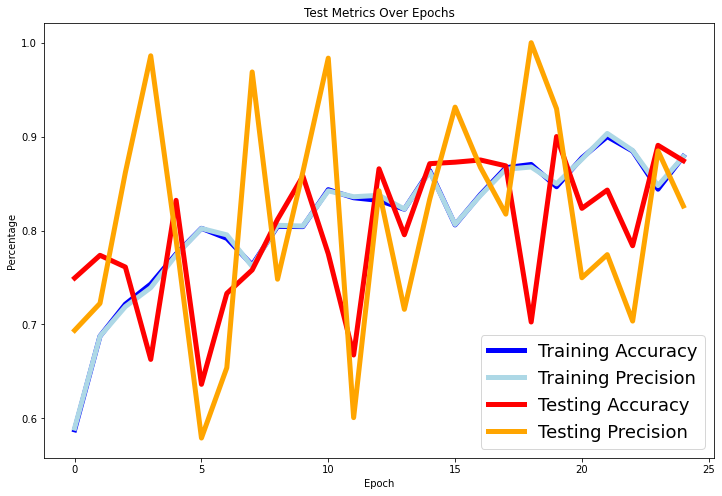

In [5]:
# Test metrics over epochs.
train_acc = history.history['accuracy']
train_pre = history.history[f'precision']
test_acc = history.history[f'val_accuracy']
test_pre = history.history[f'val_precision']

epoch_labels = history.epoch

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_acc, label='Training Accuracy', color='blue',linewidth=5)
plt.plot(train_pre, label='Training Precision', color='lightblue',linewidth=5)
plt.plot(test_acc, label='Testing Accuracy', color='red',linewidth=5)
plt.plot(test_pre, label='Testing Precision', color='orange',linewidth=5)
plt.xlabel('Epoch')
plt.ylabel('Percentage')
plt.title('Test Metrics Over Epochs')
plt.legend(fontsize=18);

In [6]:
#Model Metrics
pred=[1 if i[0]>=.5 else 0 for i in model.predict(X_test)]
print(classification_report(y_test, pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.94      0.80      0.86       640
           1       0.83      0.95      0.88       641

    accuracy                           0.87      1281
   macro avg       0.88      0.87      0.87      1281
weighted avg       0.88      0.87      0.87      1281



In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 36608)             0         
_________________________________________________________________
dropout (Dropout)            (None, 36608)             0         
_________________________________________________________________
dense (Dense)                (None, 8000)              292872000 
_________________________________________________________________
dropout_1 (Dropout)          (None, 8000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 8001      
Total params: 292,880,001
Trainable params: 292,880,001
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

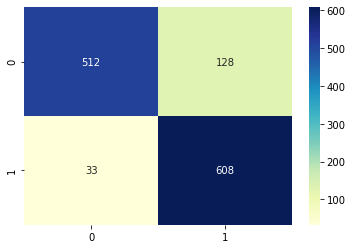

In [8]:
#Creating a confustion matrix
temp=tf.math.confusion_matrix(y_test, pred)
sns.heatmap(temp, annot=True, fmt="d",cmap="YlGnBu")